In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [69]:
kc = pd.read_csv('../data/kc_house_data.csv')

X = kc[['date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = kc['price']

X['date'] = pd.to_datetime(X['date'])
X['sales_year'] = X['date'].dt.year
X['sales_month'] = X['date'].dt.month

X['age_at_sale'] = X['sales_year'] - X['yr_built']
X['years_since_renovation'] = X['sales_year'] - np.max(X[['yr_built', 'yr_renovated']], axis = 1)

X = X.drop(columns = ['date', 'yr_built', 'yr_renovated'])

X = pd.get_dummies(X, columns = ['zipcode', 'sales_year', 'sales_month'], drop_first = True)

/home/michael/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/michael/anaconda3/envs/keras/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321)

It is usually a good idea to at least scale your predictors to help with the training process.

In [71]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss = 'mean_absolute_error', optimizer = 'adam', )

In [97]:
history = model.fit(x=X_train,y=y_train.values,
          validation_data=[X_test, y_test],
          batch_size=128,epochs=200)

Train on 16209 samples, validate on 5404 samples
Epoch 1/200
16209/16209 [==============================] - 1s 44us/step - loss: 540007.6974 - val_loss: 523530.9575
Epoch 2/200
16209/16209 [==============================] - 0s 19us/step - loss: 376241.0411 - val_loss: 188716.1514
Epoch 3/200
16209/16209 [==============================] - 0s 18us/step - loss: 182952.8912 - val_loss: 169348.2683
Epoch 4/200
16209/16209 [==============================] - 0s 18us/step - loss: 165639.2917 - val_loss: 152679.6244
Epoch 5/200
16209/16209 [==============================] - 0s 19us/step - loss: 148752.2458 - val_loss: 135397.1584
Epoch 6/200
16209/16209 [==============================] - 0s 19us/step - loss: 131072.8853 - val_loss: 118965.9303
Epoch 7/200
16209/16209 [==============================] - 0s 19us/step - loss: 117303.7859 - val_loss: 110665.3534
Epoch 8/200
16209/16209 [==============================] - 0s 17us/step - loss: 110106.4998 - val_loss: 105459.7154
Epoch 9/200
16209/16209

16209/16209 [==============================] - 0s 18us/step - loss: 68821.3200 - val_loss: 70608.7505
Epoch 72/200
16209/16209 [==============================] - 0s 18us/step - loss: 68697.7139 - val_loss: 70964.7560
Epoch 73/200
16209/16209 [==============================] - 0s 17us/step - loss: 68514.4592 - val_loss: 70415.9409
Epoch 74/200
16209/16209 [==============================] - 0s 18us/step - loss: 68430.6784 - val_loss: 70314.0750
Epoch 75/200
16209/16209 [==============================] - 0s 18us/step - loss: 68373.9402 - val_loss: 70199.3474
Epoch 76/200
16209/16209 [==============================] - 0s 17us/step - loss: 68224.3898 - val_loss: 70126.3882
Epoch 77/200
16209/16209 [==============================] - 0s 17us/step - loss: 68115.6864 - val_loss: 70315.7883
Epoch 78/200
16209/16209 [==============================] - 0s 18us/step - loss: 67969.3888 - val_loss: 70217.3817
Epoch 79/200
16209/16209 [==============================] - 0s 17us/step - loss: 67914.1368 -

Epoch 142/200
16209/16209 [==============================] - 0s 17us/step - loss: 64092.8345 - val_loss: 68819.8172
Epoch 143/200
16209/16209 [==============================] - 0s 18us/step - loss: 63977.0023 - val_loss: 68915.9029
Epoch 144/200
16209/16209 [==============================] - 0s 17us/step - loss: 63895.6861 - val_loss: 68919.0045
Epoch 145/200
16209/16209 [==============================] - 0s 17us/step - loss: 64044.7079 - val_loss: 68882.9732
Epoch 146/200
16209/16209 [==============================] - 0s 18us/step - loss: 63884.4550 - val_loss: 68985.7706
Epoch 147/200
16209/16209 [==============================] - 0s 18us/step - loss: 63900.5986 - val_loss: 68897.4689
Epoch 148/200
16209/16209 [==============================] - 0s 18us/step - loss: 63817.5224 - val_loss: 68944.6201
Epoch 149/200
16209/16209 [==============================] - 0s 17us/step - loss: 63774.1945 - val_loss: 68819.9436
Epoch 150/200
16209/16209 [==============================] - 0s 18us/ste

In [98]:
mean_absolute_error(y_test, model.predict(X_test))

68791.99665612278

We can plot the training mae vs. test mae and see that the training mae seems to continue improving while on the test set it levels off.

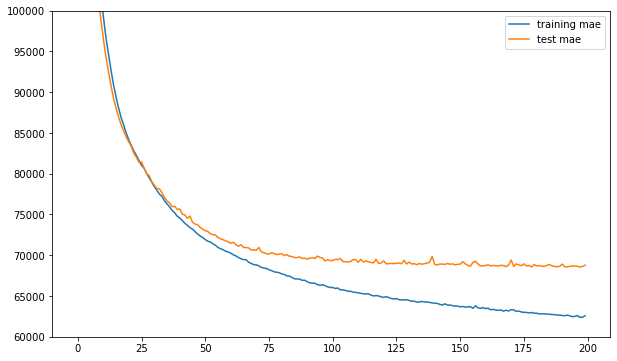

In [99]:
plt.figure(figsize = (10,6))

plt.plot(history.history['loss'], label = 'training mae')
plt.plot(history.history['val_loss'], label = 'test mae')

plt.ylim(60000, 100000)
plt.legend();